<a href="https://colab.research.google.com/github/fx-manmeet/learn-ml-repo/blob/main/ML_Metrics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning Objectives
In this tutorial, you will learn about several evaluation metrics in machine learning, like confusion matrix, cross-validation, AUC-ROC curve, and many more classification metrics.
You will also learn about the different metrics used for logistic regression for different problems.
Lastly, you will learn about cross-validation.

Dumb model
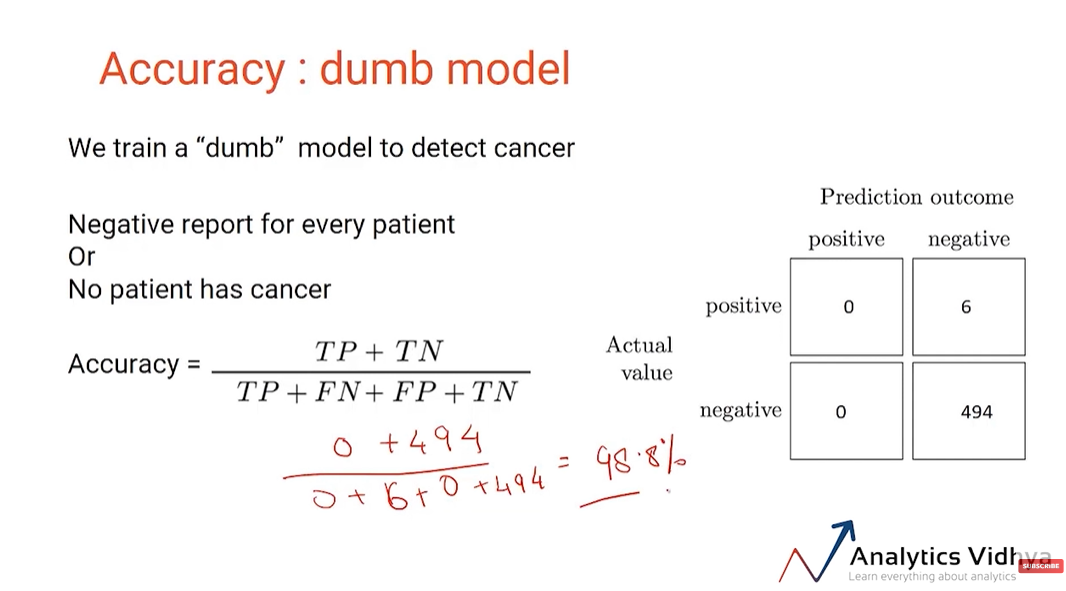

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset with 100 samples, 20 features, and 3 classes
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# # Print the shapes of the generated data
# print(f"Shape of X: {X.shape}")
# print(f"Shape of y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

1.0 0.8846153846153846


<ipython-input-6-3bd2c42a5469>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


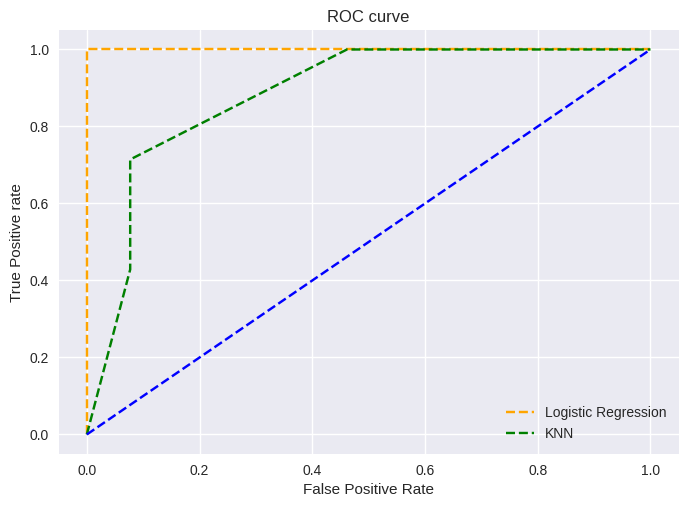

In [ ]:

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

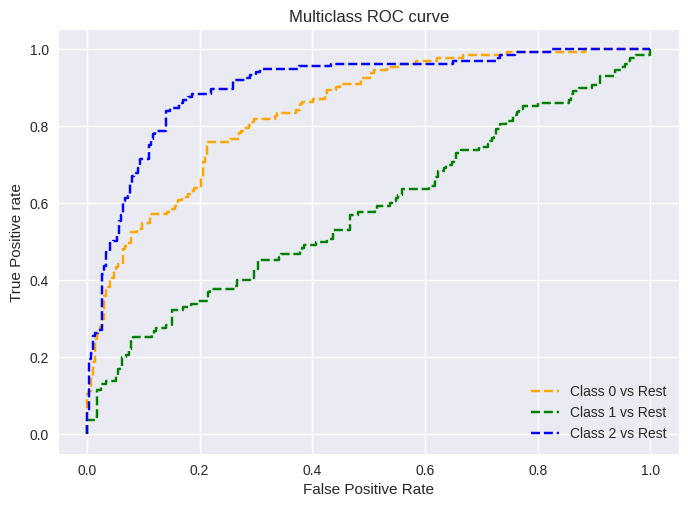

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

Kolmogorov-Smirnov Test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Create random samples
norm_a = np.random.normal(loc = 0, scale = 1, size = 500)
norm_b = np.random.normal(loc = 0.1, scale = 1, size = 500)
norm_c = np.random.normal(loc = 3, scale = 1, size = 500)
f_a = np.random.f(dfnum = 5, dfden  = 10, size = 500)

In [ ]:
norm_a.sort()
norm_b.sort()
norm_c.sort()
f_a.sort()

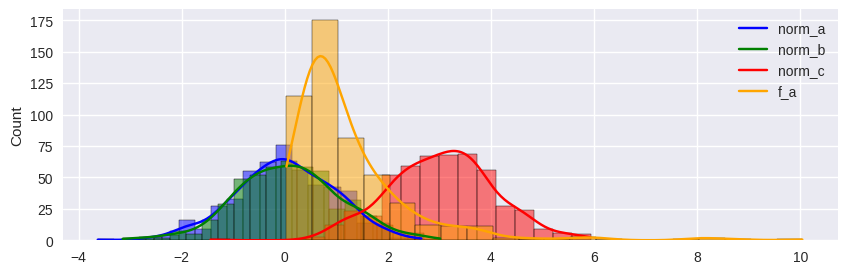

In [ ]:
# Visualize them
plt.figure(figsize = (10,3))
sns.histplot(norm_a, bins = 20, kde = True, color = 'b')
sns.histplot(norm_b, bins = 20, kde = True, color = 'g')
sns.histplot(norm_c, bins = 20, kde = True, color = 'r')
sns.histplot(f_a, bins = 20, kde = True, color = 'orange')
plt.legend(["norm_a", "norm_b", "norm_c", "f_a"])

In [ ]:
def cdf(sample, x, sort = False):
    '''
    Return the value of the Cumulative Distribution Function, evaluated for a given sample and a value x.

    Args:
        sample: The list or array of observations.
        x: The value for which the numerical cdf is evaluated.

    Returns:
        cdf = CDF_{sample}(x)
    '''

    # Sorts the sample, if needed
    if sort:
        sample.sort()

    # Counts how many observations are below x
    cdf = sum(sample <= x)

    # Divides by the total number of observations
    cdf = cdf / len(sample)

    return cdf

In [ ]:
# Creates their CDFs for visualization
cdf_norm_a = np.array([cdf(norm_a, x, sort = True) for x in norm_a])
cdf_norm_b = np.array([cdf(norm_b, x, sort = True) for x in norm_b])
cdf_norm_c = np.array([cdf(norm_c, x, sort = True) for x in norm_c])
cdf_f_a = np.array([cdf(f_a, x, sort = True) for x in f_a])

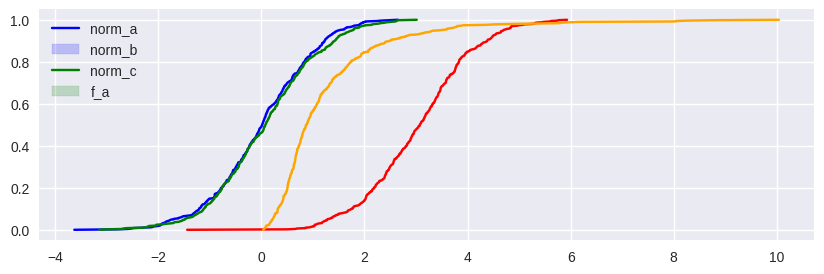

In [ ]:
# Visualize them
plt.figure(figsize = (10,3))
sns.lineplot(x = norm_a, y = cdf_norm_a, color = 'b')
sns.lineplot(x = norm_b, y = cdf_norm_b, color = 'g')
sns.lineplot(x = norm_c, y = cdf_norm_c, color = 'r')
sns.lineplot(x = f_a, y = cdf_f_a, color = 'orange')
plt.legend(["norm_a", "norm_b", "norm_c", "f_a"])

In [ ]:
norm_d = np.random.normal(loc = 0, scale = 2, size = 500)
norm_d.sort()
cdf_norm_d = np.array([cdf(norm_d, x, sort = True) for x in norm_d])

Text(0.5, 1.0, 'Kolmogorov-Smirnov Test')

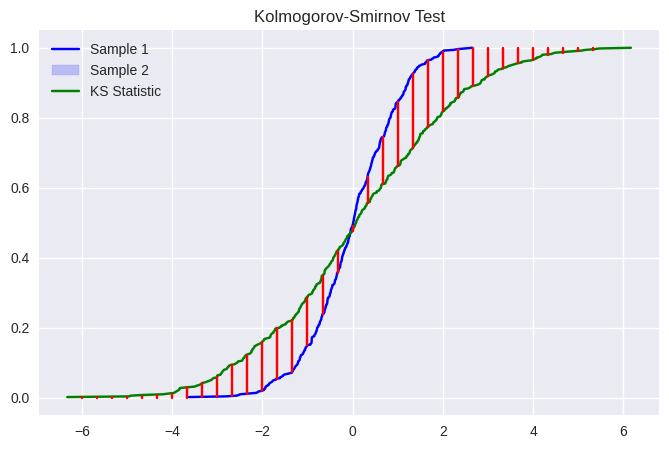

In [ ]:
plt.figure(figsize = (8,5))
sns.lineplot(x = norm_a, y = cdf_norm_a, color = 'b')
sns.lineplot(x = norm_d, y = cdf_norm_d, color = 'g')
min_x = int(min(min(norm_a), min(norm_d)))
max_x = int(max(max(norm_a), max(norm_d)))
for i in range(min_x * 3, max_x * 3):
    j = i/3
    plt.plot([j, j], [cdf(norm_a, j), cdf(norm_d, j)], color = 'r')
plt.legend(["Sample 1", "Sample 2", "KS Statistic"])
plt.title("Kolmogorov-Smirnov Test")

In [ ]:
# Calculate samples
n = 10
x = np.random.uniform(0, 1, 1000)
y = stats.kstwo.pdf(x, n = n)

Text(0.5, 1.0, 'Kolmogorov-Smirnov Distribution for en=10')

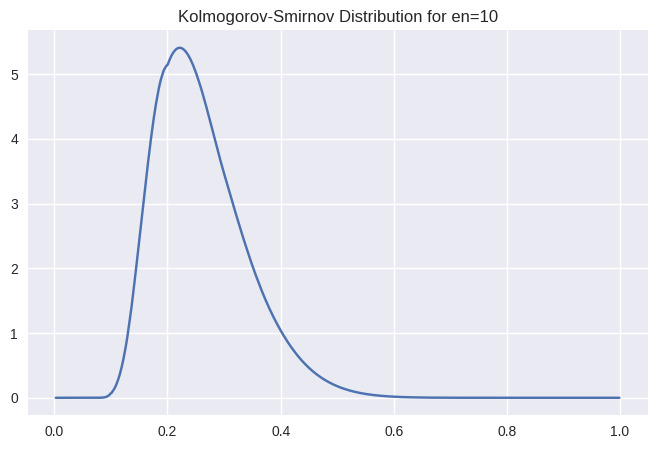

In [ ]:
plt.figure(figsize = (8,5))
sns.lineplot(x = x, y = y)
plt.title(f"Kolmogorov-Smirnov Distribution for en={n}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
def standardize(sample):
    # Standardize the data
    mean = sample.mean()
    std = sample.std()
    sample_z = (sample - mean)/std
    return sample_z

In [ ]:
size =500

In [ ]:
x_a = np.random.uniform(2, 8, size)
y_a = 0.83 * x_a + 2 + np.random.normal(loc = 0, scale = 1, size = size)

In [ ]:
x_b = np.random.uniform(2, 15, size)
y_b = (x_b ** 2) + 1 + np.random.normal(loc = 0, scale = 5, size = size)

In [ ]:
x_c = np.random.uniform(2, 20, size)
y_c = [(0.79 * x + 5 + np.random.normal(loc = 0, scale = (0.75 * x), size = 1))[0] for x in x_c]

<Axes: >

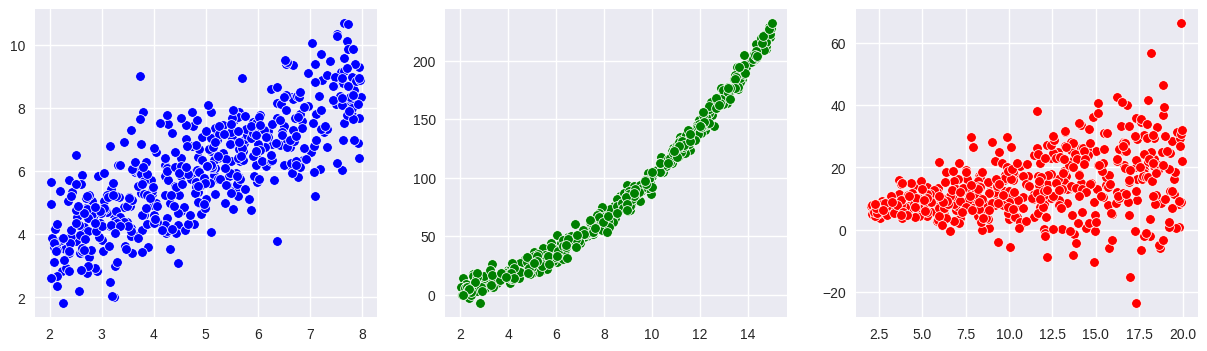

In [ ]:
plt.figure(figsize = (15, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x = x_a, y = y_a, ax = ax1, color = 'b')
sns.scatterplot(x = x_b, y = y_b, ax = ax2, color = 'g')
sns.scatterplot(x = x_c, y = y_c, ax = ax3, color = 'r')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_a = LinearRegression()
model_a.fit(x_a.reshape(-1, 1), y_a)
y_pred_a = model_a.predict(x_a.reshape(-1, 1))

In [ ]:
model_b = LinearRegression()
model_b.fit(x_b.reshape(-1, 1), y_b)
y_pred_b = model_b.predict(x_b.reshape(-1, 1))

In [ ]:
model_c = LinearRegression()
model_c.fit(x_c.reshape(-1, 1), y_c)
y_pred_c = model_c.predict(x_c.reshape(-1, 1))

<Axes: >

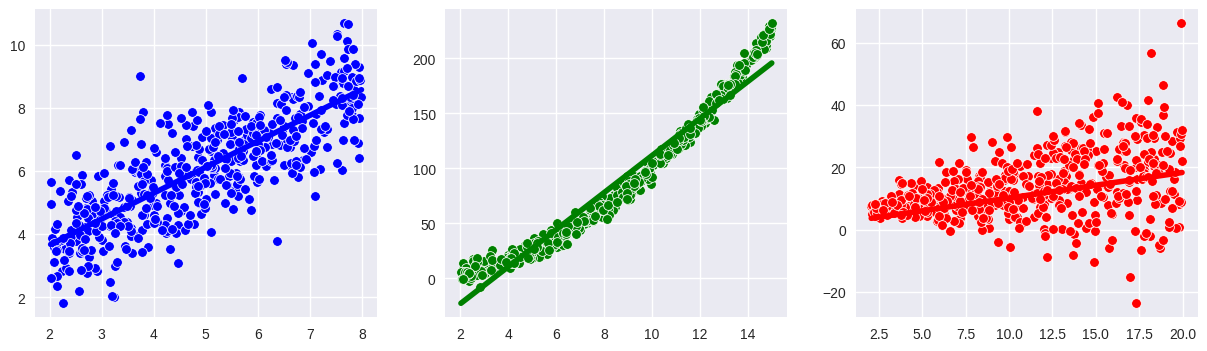

In [ ]:
plt.figure(figsize = (15, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x = x_a, y = y_a, ax = ax1, color = 'b')
sns.scatterplot(x = x_b, y = y_b, ax = ax2, color = 'g')
sns.scatterplot(x = x_c, y = y_c, ax = ax3, color = 'r')
sns.lineplot(x = [min(x_a), max(x_a)], y = model_a.predict(np.array([min(x_a), max(x_a)]).reshape(-1, 1)), ax = ax1, color = 'blue', linewidth =  4)
sns.lineplot(x = [min(x_b), max(x_b)], y = model_b.predict(np.array([min(x_b), max(x_b)]).reshape(-1, 1)), ax = ax2, color = 'green', linewidth =  4)
sns.lineplot(x = [min(x_c), max(x_c)], y = model_a.predict(np.array([min(x_c), max(x_c)]).reshape(-1, 1)), ax = ax3, color = 'red', linewidth =  4)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
def evaluate_regressor(y_real, y_pred):
    print(f"MAE: {mae(y_real, y_pred):.4f}")
    print(f"MSE: {mse(y_real, y_pred):.4f}")
    print(f"RMSE: {(mse(y_real, y_pred))**(1/2):.4f}")
    print(f"R2: {r2_score(y_real, y_pred):.4f}")

In [ ]:
print("Model A:")
evaluate_regressor(y_a, y_pred_a)

Model A:
MAE: 0.8108
MSE: 1.0548
RMSE: 1.0270
R2: 0.6421


In [ ]:
print("Model B:")
evaluate_regressor(y_b, y_pred_b)

Model B:
MAE: 11.1019
MSE: 179.2192
RMSE: 13.3873
R2: 0.9551


In [ ]:
print("Model C:")
evaluate_regressor(y_c, y_pred_c)

Model C:
MAE: 6.7645
MSE: 88.7576
RMSE: 9.4211
R2: 0.1484


In [ ]:
residuals_a = y_a - y_pred_a
residuals_b = y_b - y_pred_b
residuals_c = y_c - y_pred_c

<Axes: ylabel='Count'>

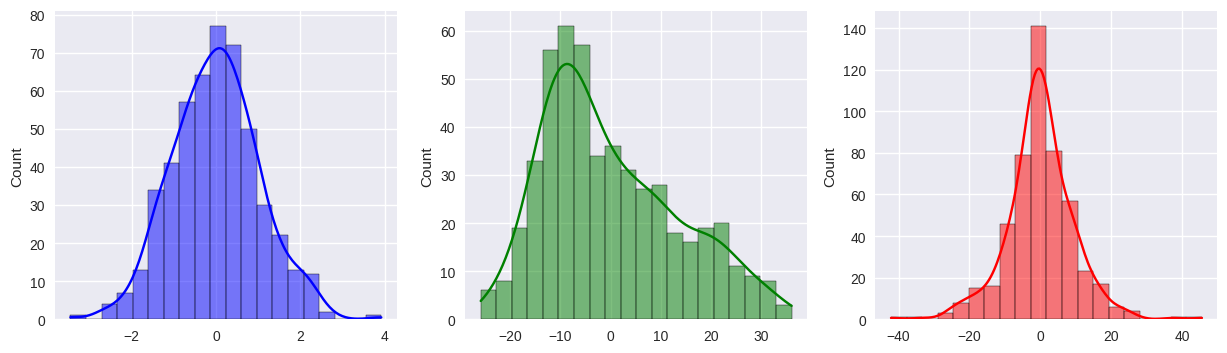

In [ ]:
plt.figure(figsize = (15, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.histplot(residuals_a, color = 'b', ax = ax1, bins = 20, kde = True)
sns.histplot(residuals_b, color = 'g', ax = ax2, bins = 20, kde = True)
sns.histplot(residuals_c, color = 'r', ax = ax3, bins = 20, kde = True)

In [ ]:
# Evaluates the KS test
ks_norm_a = stats.ks_1samp(x = standardize(residuals_a), cdf = stats.norm.cdf)
ks_norm_b = stats.ks_1samp(x = standardize(residuals_b), cdf = stats.norm.cdf)
ks_norm_c = stats.ks_1samp(x = standardize(residuals_c), cdf = stats.norm.cdf)

In [ ]:
# Prints the results
print(f"norm_a: ks = {ks_norm_a.statistic:.4f} (p-value = {ks_norm_a.pvalue:.3e}, is normal = {ks_norm_a.pvalue > 0.05})")
print(f"norm_b: ks = {ks_norm_b.statistic:.4f} (p-value = {ks_norm_b.pvalue:.3e}, is normal = {ks_norm_b.pvalue > 0.05})")
print(f"norm_c: ks = {ks_norm_c.statistic:.4f} (p-value = {ks_norm_c.pvalue:.3e}, is normal = {ks_norm_c.pvalue > 0.05})")

norm_a: ks = 0.0217 (p-value = 9.689e-01, is normal = True)
norm_b: ks = 0.1091 (p-value = 1.230e-05, is normal = False)
norm_c: ks = 0.0782 (p-value = 4.143e-03, is normal = False)
